In [47]:
# Importing our Packages & ibraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import sys
# !conda list Check the packages installed

In [48]:
# Loading the data
raw_data = pd.read_csv('Cars.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()


(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Preprocessing & EDA

In [49]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

In [50]:
# Checking for null values

raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Investigating the numeric values with scatterplots

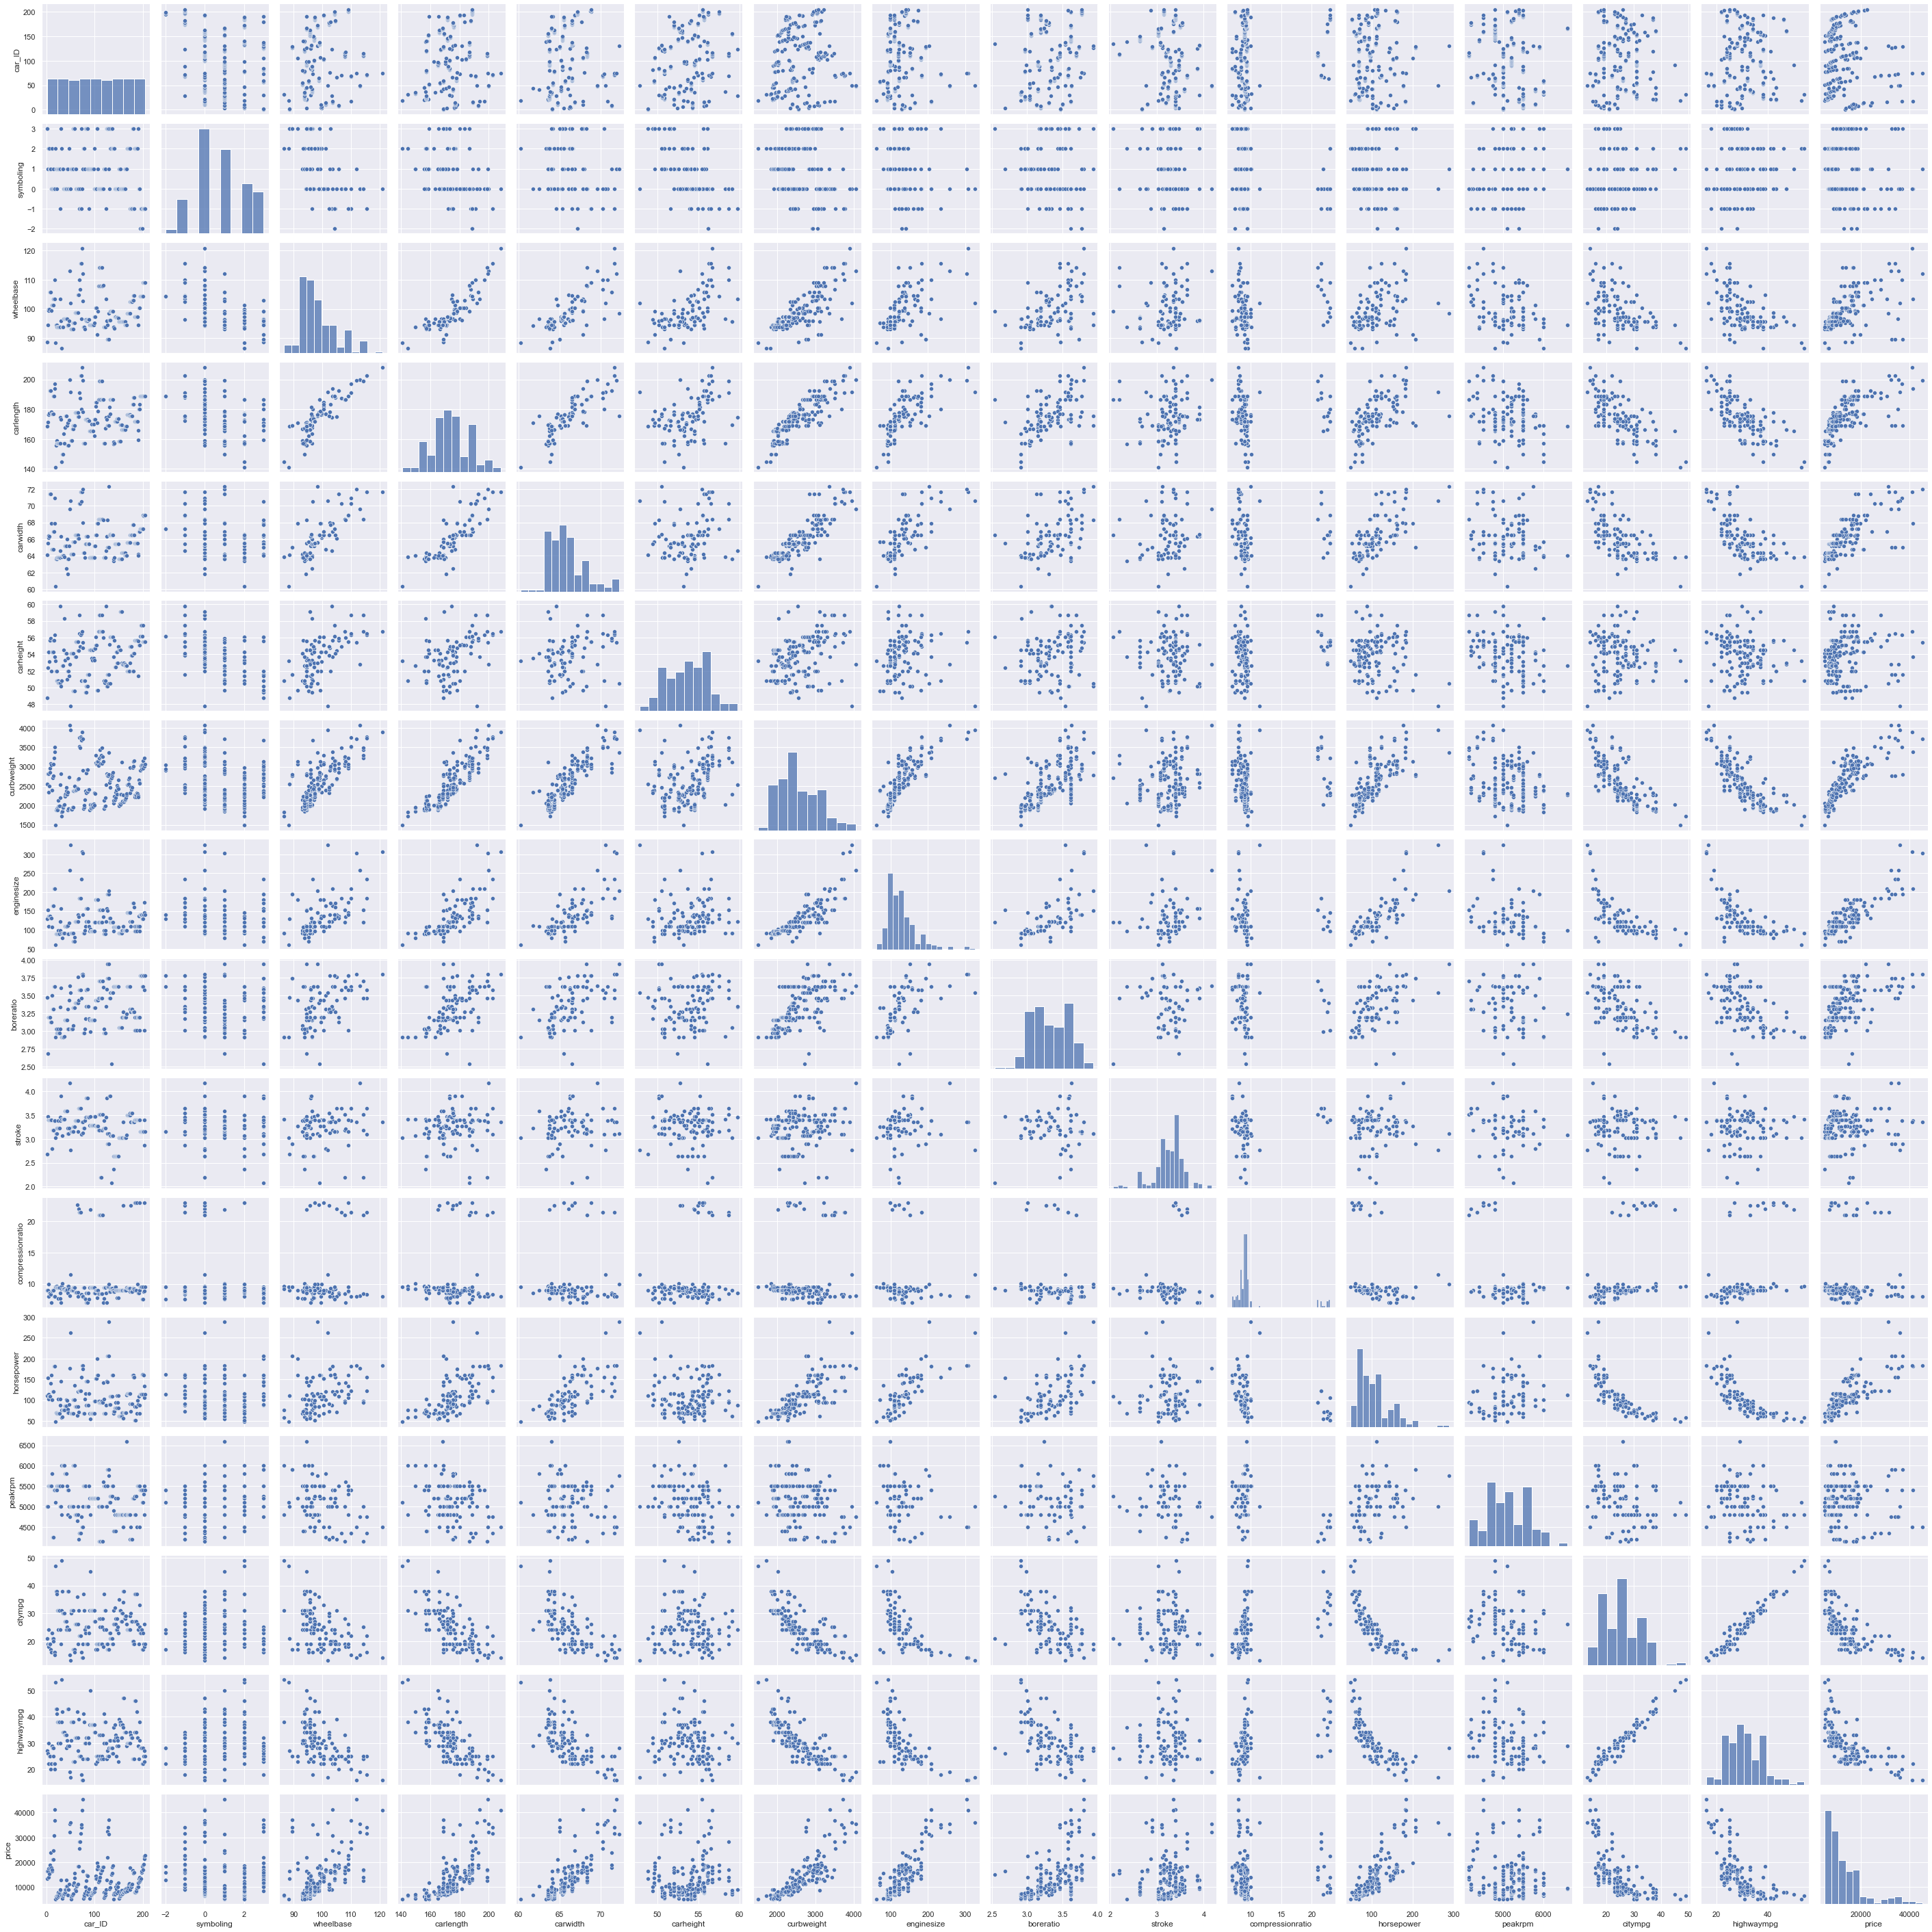

In [51]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

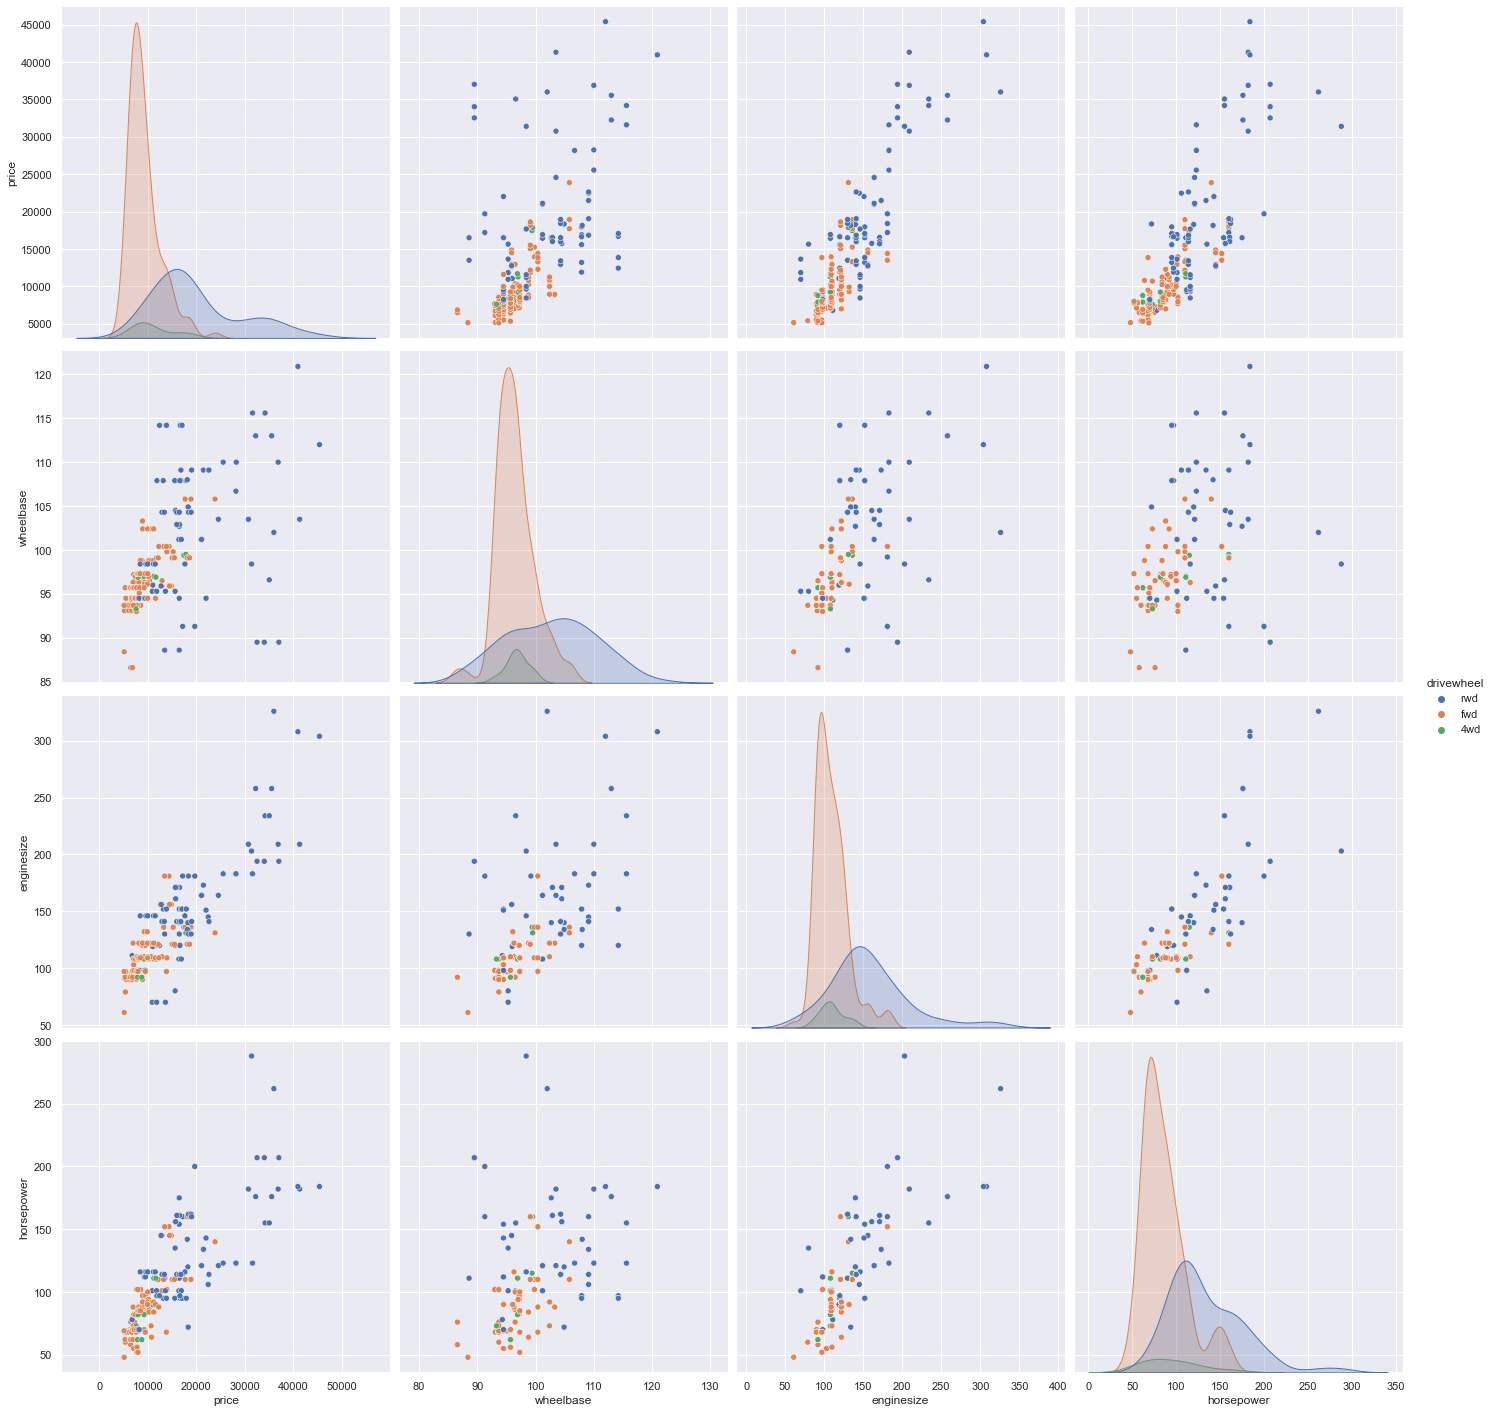

In [52]:
# Example 2 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

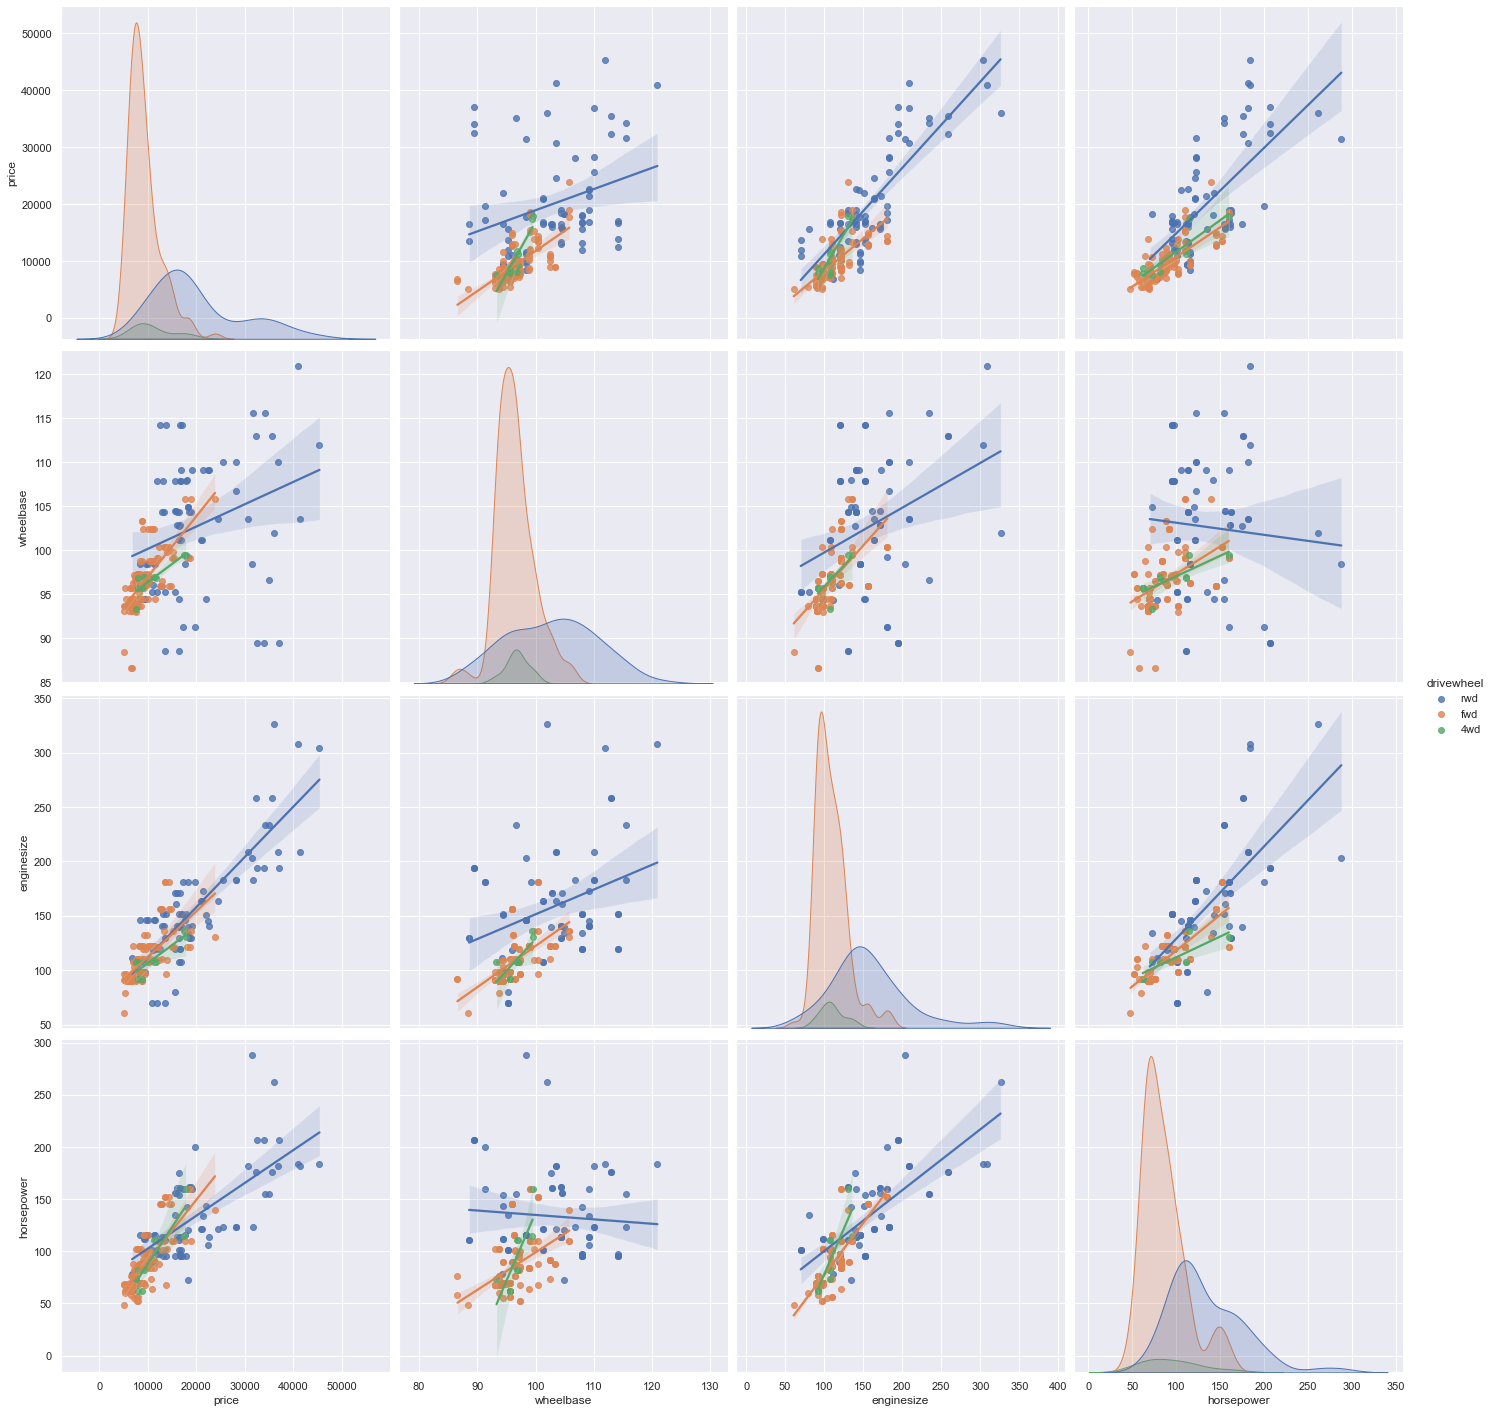

In [53]:
# Example 3 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

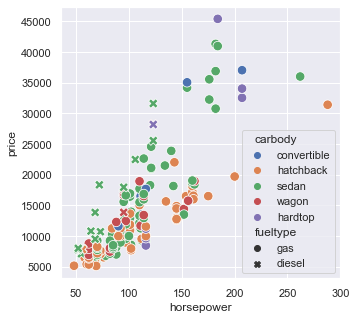

In [54]:
# Example 4 - Relationship between price and horsepower by carbody

ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

### Investigating the categorical data

,carbody,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10376.652386
3,sedan,14344.270833
4,wagon,12371.960000


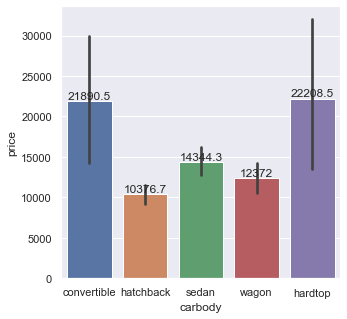

In [55]:
# Example 5 - Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

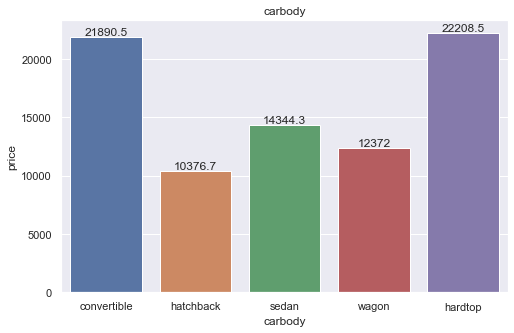

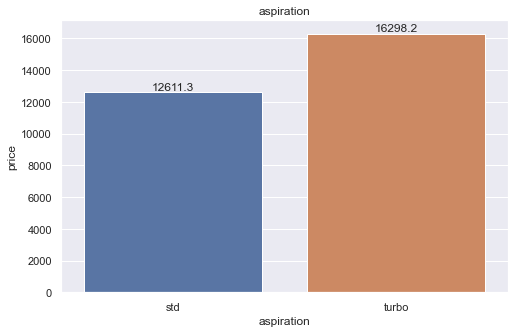

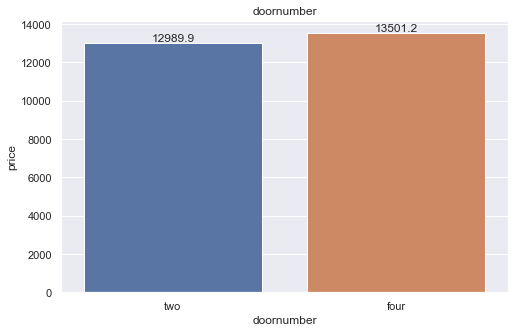

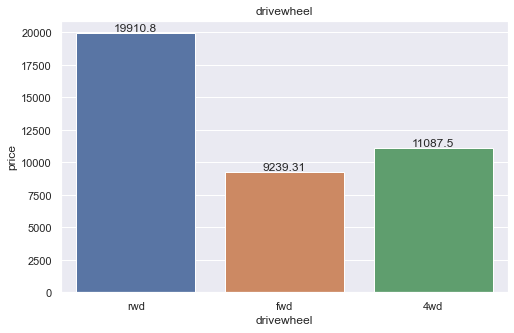

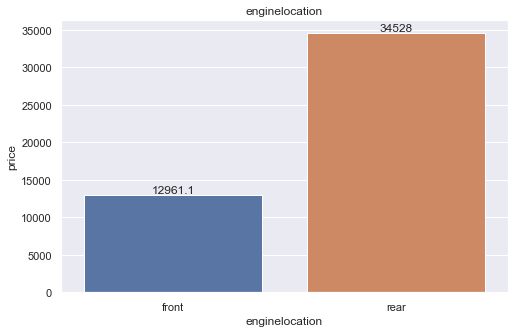

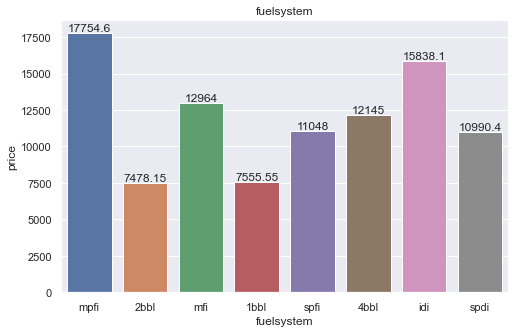

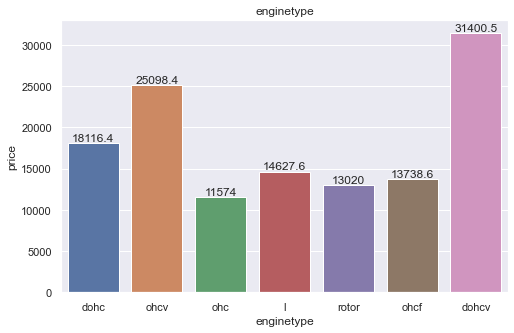

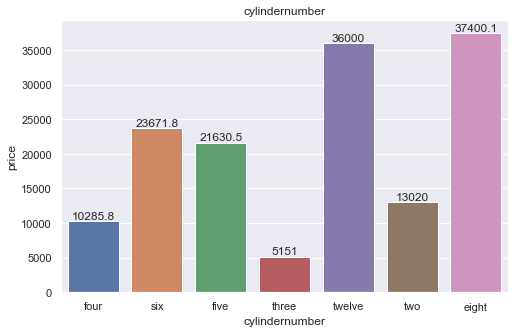

In [56]:
# Example 6 - Total price by carbody for multible categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

### Investigating the distributions with disti plots

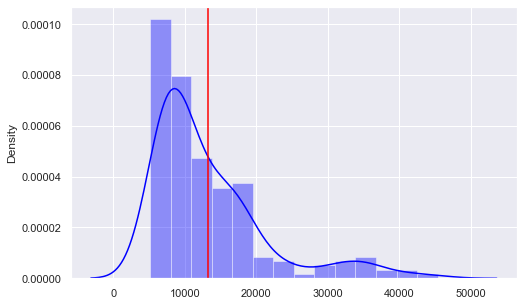

In [57]:
# Example 7 - Investigating the distribution of price, adding the mean

x = raw_data['price'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

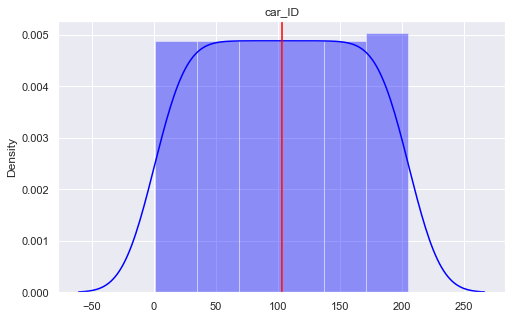

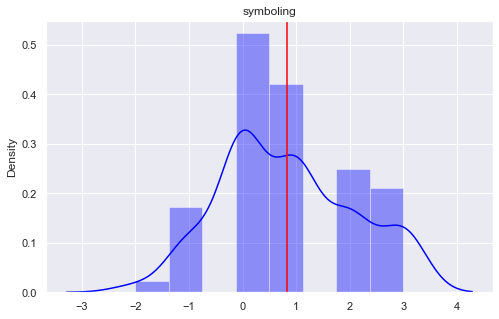

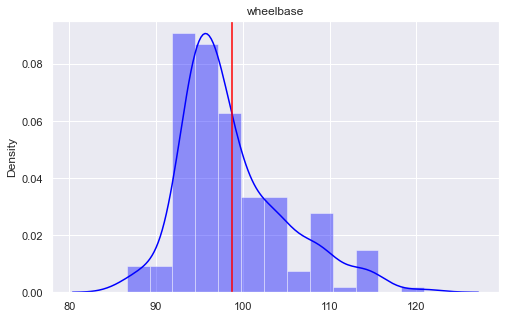

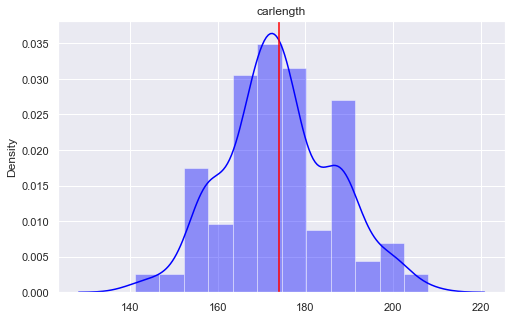

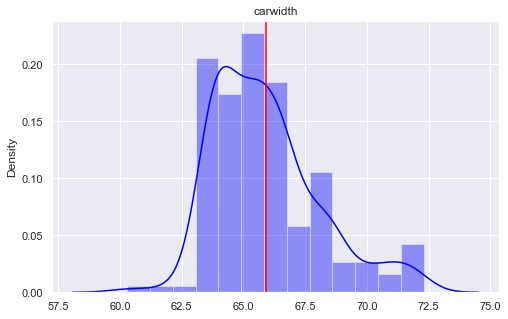

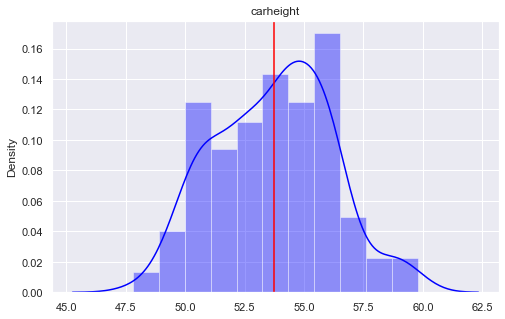

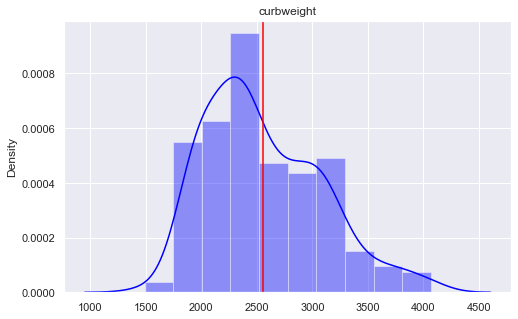

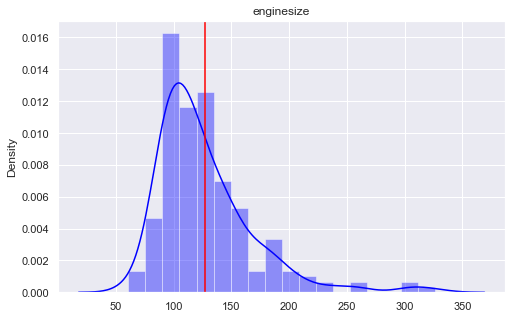

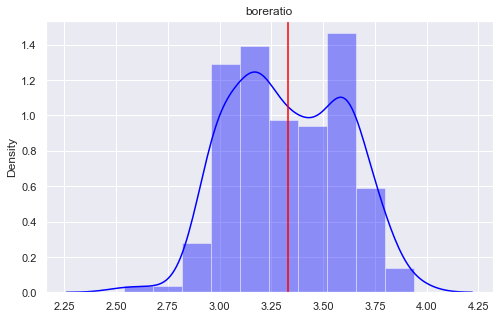

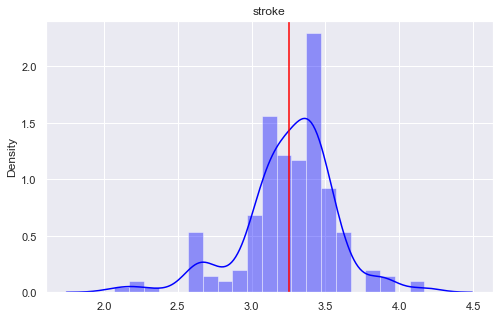

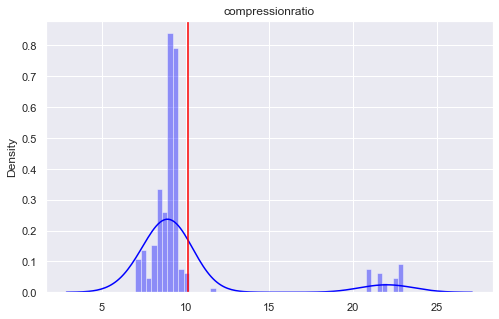

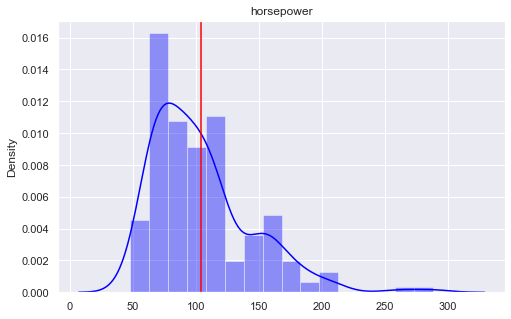

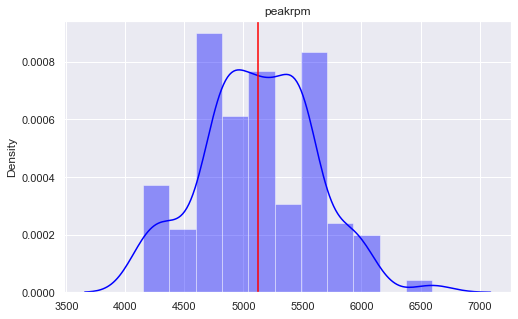

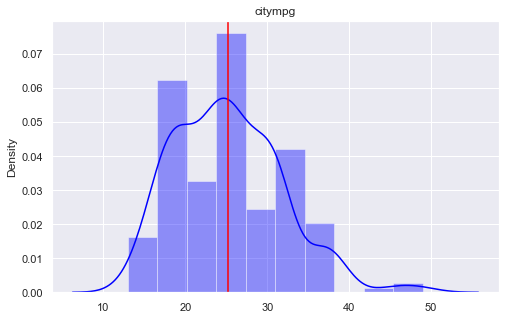

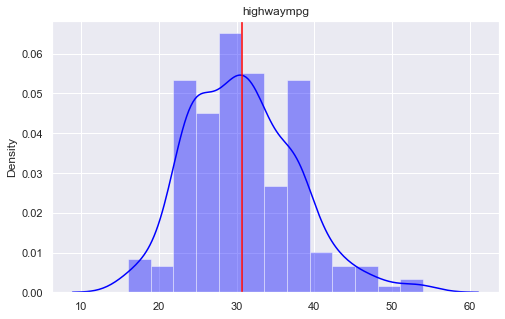

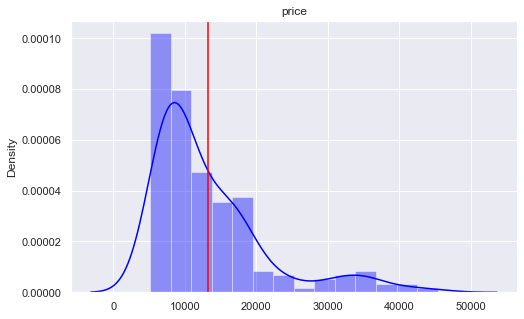

In [58]:
# Example 8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns # taking only those columns with numeric values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [59]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Investigating the distribution and outliers with Box plots

The meadian is:  10295.0


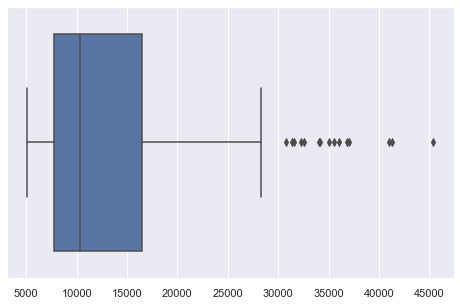

In [60]:
# Example 9 - Investigating the distribution of Price

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# IQR(interquartile range)= Q3-Q1
# The whiskers (the left whisker, which is calculated as Q1-1.5*IQR shows the minimum quartile while the right whisker,
# which is calculated as Q3+1.5*IQR, shows the maximum quartile.
# The dots on the right are "outliers"

The meadian is:  103.0


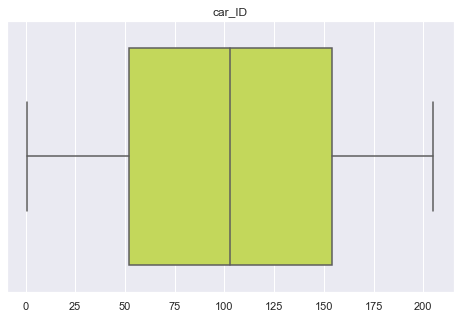

The meadian is:  1.0


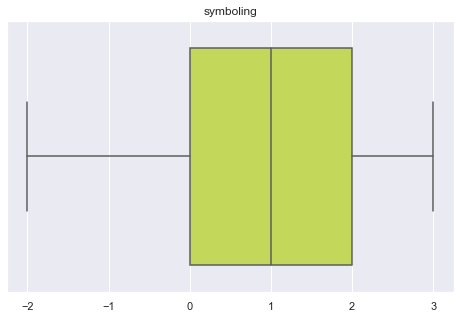

The meadian is:  97.0


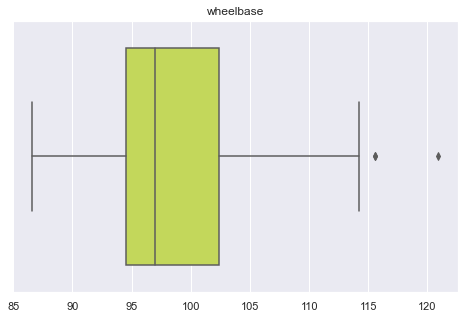

The meadian is:  173.2


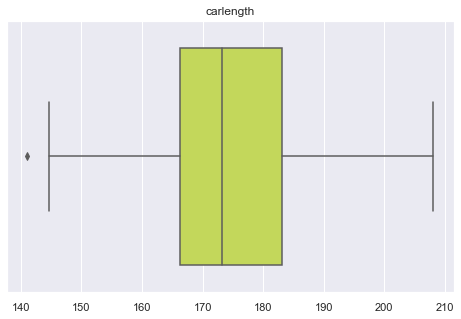

The meadian is:  65.5


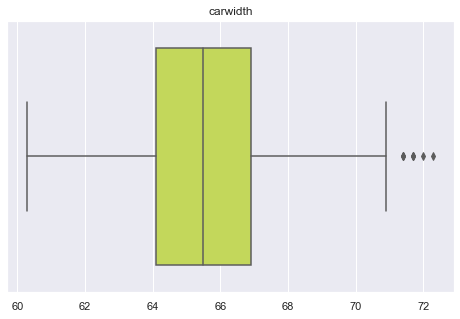

The meadian is:  54.1


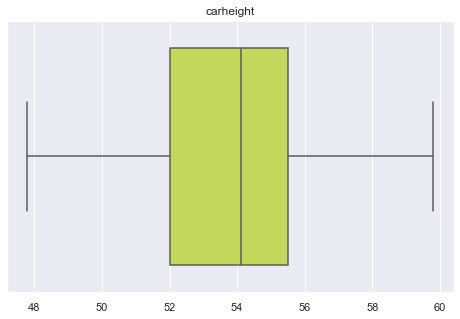

The meadian is:  2414.0


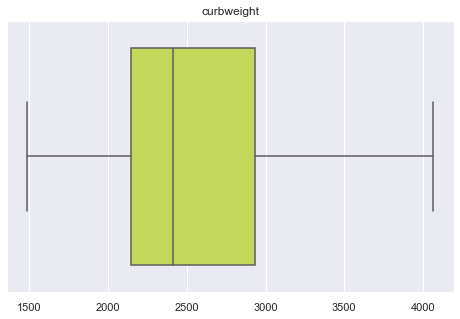

The meadian is:  120.0


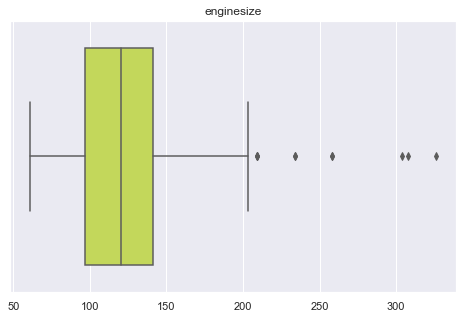

The meadian is:  3.31


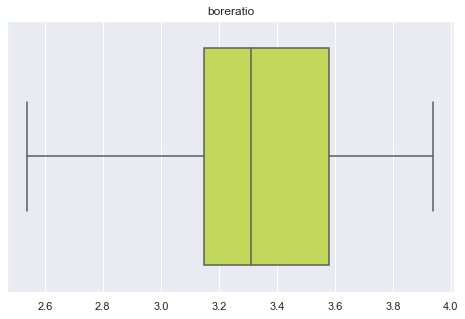

The meadian is:  3.29


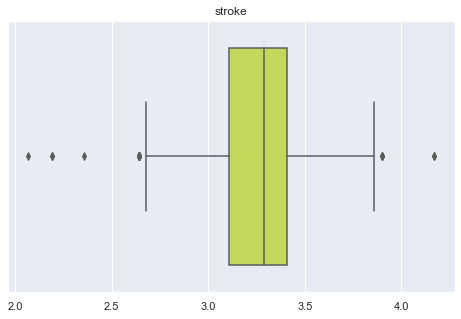

The meadian is:  9.0


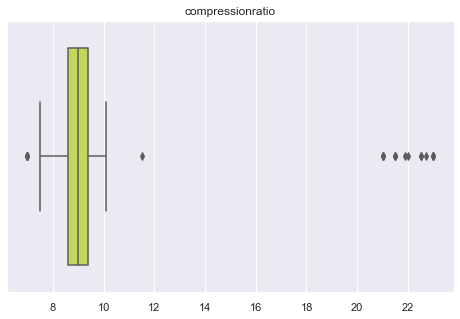

The meadian is:  95.0


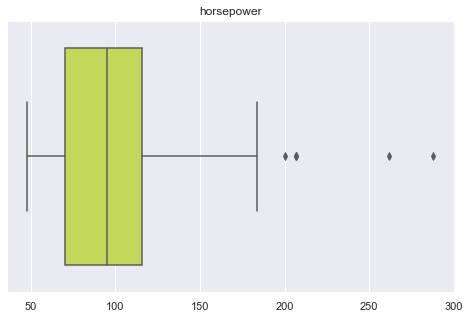

The meadian is:  5200.0


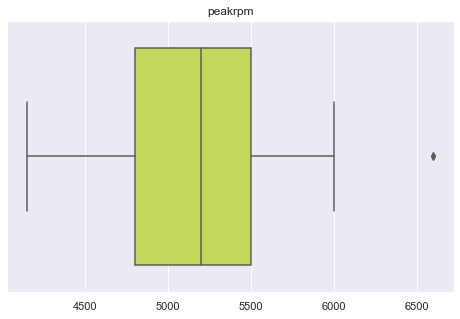

The meadian is:  24.0


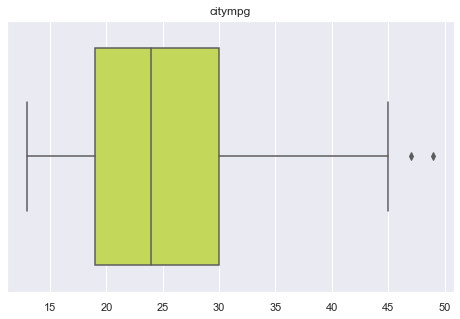

The meadian is:  30.0


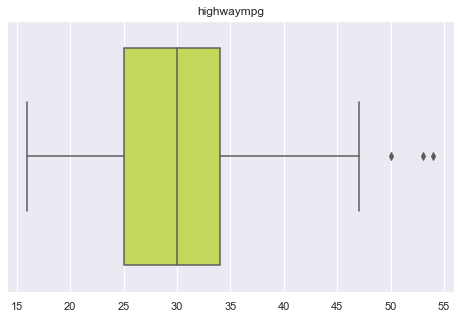

The meadian is:  10295.0


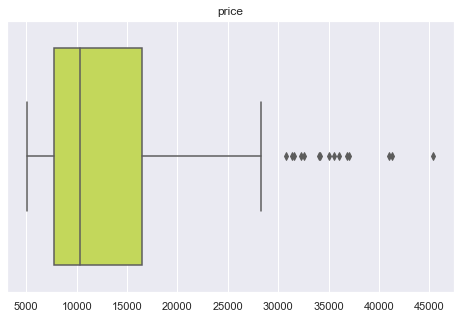

In [61]:
# Example 10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

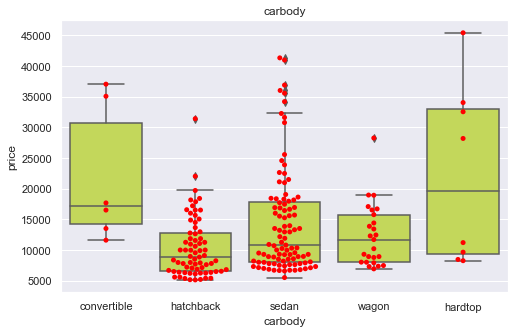

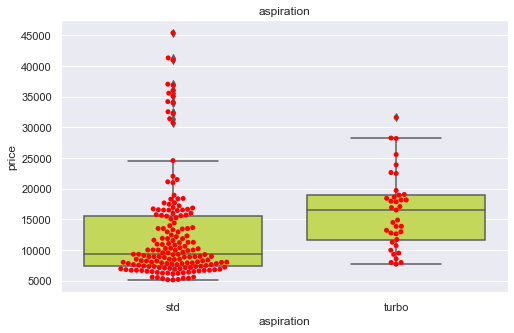

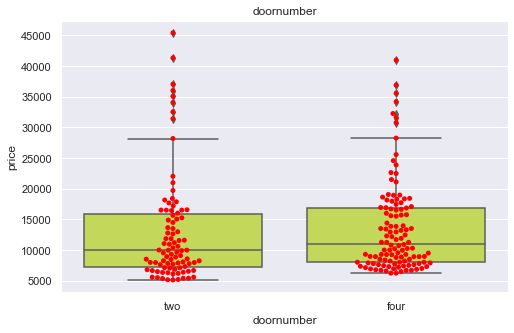

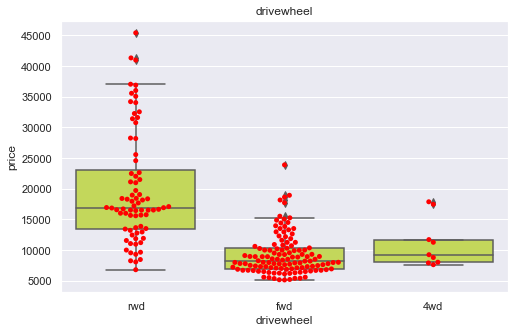

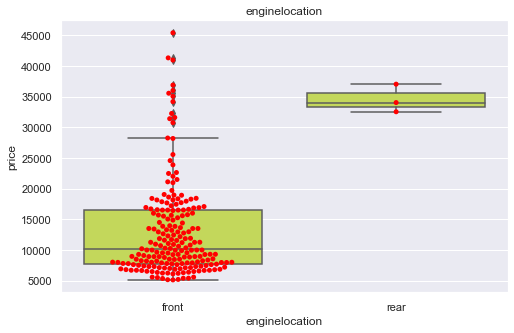

/Users/abelfereja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


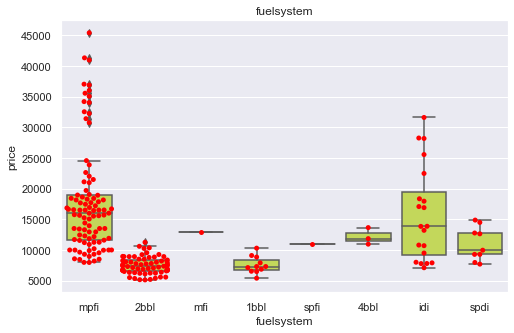

/Users/abelfereja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


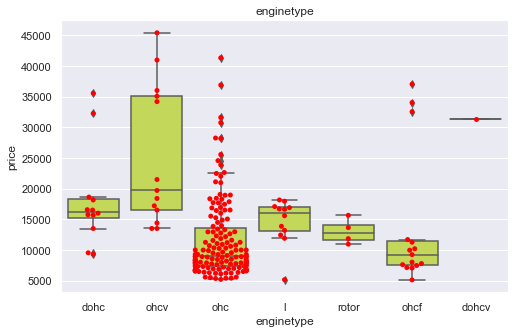

/Users/abelfereja/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


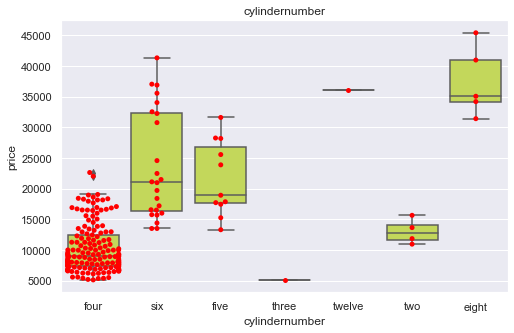

In [62]:
# Example 11 - Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

### Converting the categorical values into numerical representation

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [64]:
raw_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [66]:
# Making categorical variables into numeric representation including the cylinder number column

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

/Users/abelfereja/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [67]:
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Selecting the important features

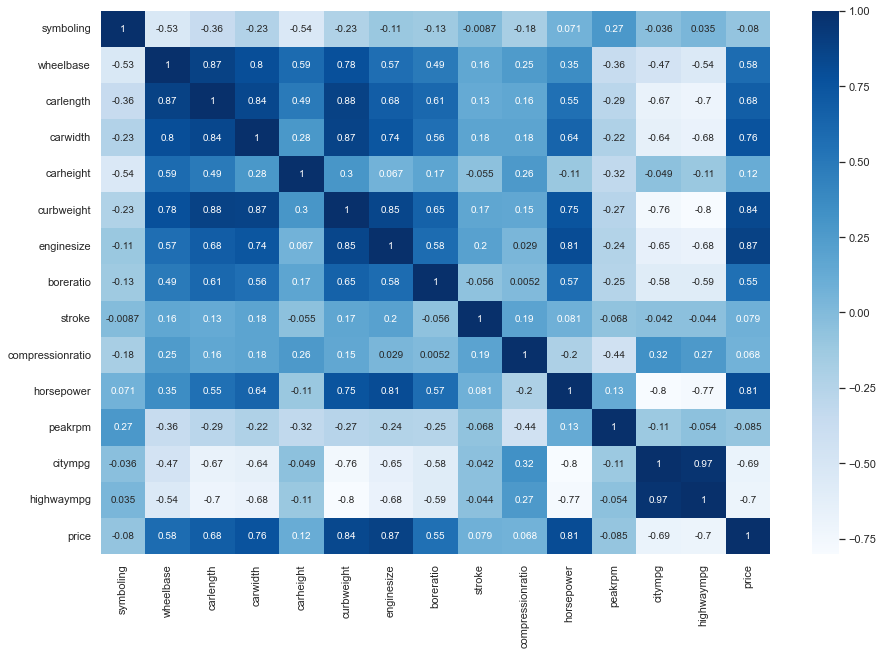

In [68]:
# Example 12 - Heatmap 

# droping columns we don't need
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson') #.corr() is used to find the pairwise correlation of all
                                    #columns in the dataframe. Any null values are automatically excluded

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

### Feature Importance

In [69]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [70]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [71]:
dt.feature_importances_

array([0.067097, 0.008362, 0.106282, 0.057973, 0.039068, 0.110696,
       0.241150, 0.001786, 0.053168, 0.004961, 0.016314, 0.008851,
       0.094566, 0.014268, 0.014436, 0.048669, 0.000000, 0.005677,
       0.011418, 0.001297, 0.009659, 0.001297, 0.012283, 0.017902,
       0.006655, 0.000000, 0.009690, 0.003890, 0.003890, 0.000000,
       0.000000, 0.004934, 0.000000, 0.008393, 0.000000, 0.003083,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.009690,
       0.000000, 0.000000, 0.000000, 0.000000, 0.002594])

In [72]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('price', axis=1).columns,    
    class_names=new_raw_data['price'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [73]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [74]:
#del final_fi 
# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)): 
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i])) 
        
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]}) 
    try: final_fi = pd.concat([final_fi,fi], ignore_index = True) 
    except: final_fi = fi 
            
# Ordering the data 
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index() 
final_fi

Importance of feature car_ID:, 0.067
Importance of feature symboling:, 0.008
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.058
Importance of feature carwidth:, 0.039
Importance of feature carheight:, 0.111
Importance of feature curbweight:, 0.241
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.053
Importance of feature boreratio:, 0.005
Importance of feature stroke:, 0.016
Importance of feature compressionratio:, 0.009
Importance of feature horsepower:, 0.095
Importance of feature peakrpm:, 0.014
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.049
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.006
Importance of feature carbody_hatchback:, 0.011
Importance of feature carbody_sedan:, 0.001
Importance of feature carbody_wagon:, 0.010
Importance of feature aspiration_std:, 0.001
Importance of feature aspiration_turbo:, 0.012
Importance of feature doornumbe

,level_0,index,Variable,Feature Importance Score
0,0,6.0,curbweight,0.241150
1,53,NaN,curbweight,0.241150
2,1,5.0,carheight,0.110696
3,52,NaN,carheight,0.110696
4,2,2.0,wheelbase,0.106282
...,...,...,...,...
89,43,32.0,fuelsystem_4bbl,0.000000
90,34,44.0,enginetype_rotor,0.000000
91,33,45.0,fueltype_diesel,0.000000
92,32,39.0,enginetype_dohcv,0.000000


### Splitting the Raw Data - Hold-out validation

In [75]:
# Hold-out validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(164, 47)
(41, 47)
(164,)
(41,)


## Running Linear Regression

In [76]:
# Training the Regression 
lm = LinearRegression(fit_intercept = True) 
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [77]:
y_train

49     36000
188     9995
142     7775
55     10945
166     9538
       ...  
128    37028
119     7957
133    12170
140     7603
200    16845
Name: price, Length: 164, dtype: int64

In [78]:
y_pred

array([39258.792852, 9526.672999, 6532.094035, 12151.479984, 8508.412201,
       9782.884174, 8138.057939, 15645.000000, 7754.106941, 15460.917162,
       16521.714355, 21256.298612, 31161.073969, 6247.979956, 8862.940322,
       18211.780490, 16696.906515, 10371.478405, 12147.370982,
       6421.278620, 7620.986789, 18790.661630, 5578.267871, 16596.425697,
       7984.134876, 9463.648609, 17267.025647, 15588.493910, 34456.627168,
       13197.149397, 12118.507392, 10397.903632, 15915.079653,
       19926.617764, 28021.337169, 16208.877656, 6217.657760,
       12985.299526, 10582.694789, 18672.039670, 9137.387341, 6915.673974,
       11887.833216, 12775.364125, 6201.438685, 10367.241732, 7453.833462,
       9171.514982, 11727.270811, 12066.322987, 22970.288408,
       11107.537016, 7369.493254, 18097.425177, 4453.756270, 6857.043533,
       8034.146250, 9853.204056, 5236.107861, 9731.647273, 15586.557982,
       8748.180391, 15134.334395, 27615.602923, 13154.733805, 5438.594660,
      

In [79]:
# Model Accuracy on training dataset 
print('The Accuracy on the training dataset is: ', lm.score(X_train, y_train) ) 
print('The Accuracy r2 on the training dataset prediction is: ',r2_score(y_train,y_pred) ) 
print("") 
# Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm.score(X_test, y_test) ) 
print("") 
# The Root Mean Squared Error (RMSE) 
print('The RMSE on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print("") 
# The Mean Absolute Error (MAE) 
print('The MAE on the training dataset is: ',mean_absolute_error(y_train,y_pred)) 
print('The MAE on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test))) 
print("")
# Coefficients
print('Coefficients: ', lm.coef_ ) 
print("") 
# The Intercept 
print('Intercept: ', lm.intercept_) 
# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html # RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html # MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy on the training dataset is:  0.939012854622914
The Accuracy r2 on the training dataset prediction is:  0.939012854622914

The Accuracy on the testing dataset is:  0.8508618050906759

The RMSE on the training dataset is:  1943.8483950356274
The RMSE on the testing dataset is:  3224.517969389178

The MAE on the training dataset is:  1422.0261986002438
The MAE on the testing dataset is:  2273.470675281293

Coefficients:  [-15.330950 310.151322 59.886408 -29.377917 546.770707 323.313594 5.310580
 -1430.395287 176.711113 -8126.107835 -5483.145262 -786.406633 13.581598
 2.554469 -10.337758 212.293090 3085.668953 -1977.929992 157.227140
 136.622407 -1401.588508 -633.439236 633.439236 170.495715 -170.495715
 -721.843059 -891.009633 1612.852691 -4227.250691 4227.250691 -1039.568450
 752.677402 650.137888 3709.099959 -2488.091529 1313.157971 -1376.357399
 -1521.055842 -2566.560595 3601.273250 -3836.289677 972.667940 2115.205993
 -5921.093144 5634.796234 3709.099959 -3709.099959]

In

### Trying Regression with less variables

In [80]:
final_fi['Variable'][0:10].values

array(['curbweight', 'curbweight', 'carheight', 'carheight', 'wheelbase',
       'wheelbase', 'horsepower', 'horsepower', 'car_ID', 'car_ID'],
      dtype=object)

In [81]:
# Split the data into X & y 
test1 = final_fi['Variable'][0:10].values 
X2 = new_raw_data[test1].values 
y2 = new_raw_data['price'].astype(int) 

# Hold-out validation 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15) 
print(X.shape) 
print(y.shape) 
lm2 = LinearRegression(fit_intercept = True) 
lm2.fit(X_train, y_train) 
y_pred = lm2.predict(X_train) 

# Model Accuracy on testing dataset 
print('The Accuracy on the testing dataset is: ', lm2.score(X_test, y_test) ) 
print('The RMSE on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy on the testing dataset is:  0.8138850523763757
The RMSE on the testing dataset is:  3602.1433138755897
The MAE on the testing dataset is:  2447.777496582657
